<a href="https://colab.research.google.com/github/Ppangchon/project/blob/main/Traintrycode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL
import plotly
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D, Flatten, Dropout, MaxPool2D)
import time
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import requests
from IPython.display import Image
from io import BytesIO  
import pickle as p 
import plotly.graph_objs as go  

# 2. ข้อมูล

In [2]:
from google.colab import drive # เชื่อม drive ของเรา Mounted at /content/drive เชื่อมสำเร็จ
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์
path = '/content/drive/My Drive/finaleye'  # data เราอยู่โฟล์เดอร์ไหน

In [4]:
train_dir ="/content/drive/My Drive/finaleye/train"   # สำหรับ Train
test_dir ="/content/drive/My Drive/finaleye/test"     # สำหรับ Validation
val_dir ="/content/drive/My Drive/finaleye/validation"       # สำหรับ Test

target_img_shape = (256, 256)           #  ขนาดภาพ input เข้าสู่ Model (W x H)

In [5]:
# กำหนดให้ Normalize pixel
train_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir, target_size=target_img_shape, batch_size=10, class_mode='categorical')

Found 17779 images belonging to 4 classes.


In [6]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir, target_size=target_img_shape, batch_size=10, class_mode='categorical')   

Found 2217 images belonging to 4 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_dir, target_size=target_img_shape, batch_size=10, class_mode='categorical')   

Found 2182 images belonging to 4 classes.


จัดรูปแบบโครงสร้าง

# Visualization
  สรุปข้อมูลแต่ละคลาสมีจำนวนภาพเท่าใด

In [8]:
print('Train')
ids, counts = np.unique(train_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนภาพของคลาส

Train
[0 1 2 3]
[4552 4469 4385 4373]


In [9]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนข้อมูลของคลาส

Validation
[0 1 2 3]
[528 546 540 603]


In [10]:
print('Test')
ids, counts = np.unique(test_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนข้อมูลของคลาส

Test
[0 1 2 3]
[552 570 528 532]


In [11]:
train_set[0][0][0].shape

(256, 256, 3)

In [12]:
labels = (train_set.class_indices)
print(labels)

{'CSC': 0, 'Normal': 1, 'PCV': 2, 'VKH': 3}


In [13]:
num_classes = 4

## คำนวณสัดส่วน

In [ ]:
#_ , train_count = np.unique(train_set.classes, return_counts = True)
#_ , val_count = np.unique(val_set.classes, return_counts = True)

#print('Ratio Validation/Training set:',
#      val_count/(train_count + val_count) * 100)

Ratio Validation/Training set: [50. 50. 50. 50.]


## ดูตัวอย่างคลาส และ Visualize ภาพ

{'CSC': 0, 'Normal': 1, 'PCV': 2, 'VKH': 3}
(10, 256, 256, 3)
(10, 4)
class: [0. 0. 0. 1.]


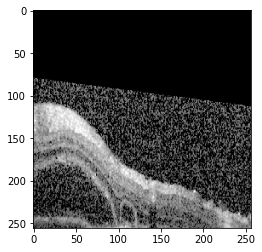

In [14]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  plt.imshow(image_batch[0])
  print('class:', labels_batch[0])
  break

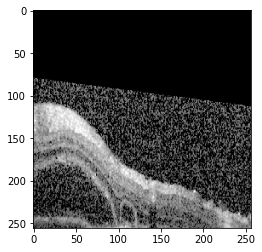

In [15]:
# หรือจะแสดงภาพด้วยโค้ดนี้
plt.imshow(train_set[0][0][0])
plt.show()

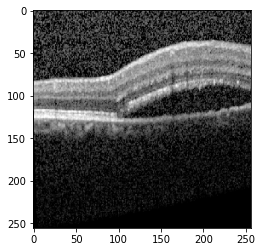

In [16]:
# ตรวจดูภาพใน Validation set
plt.imshow(val_set[0][0][0])
plt.show()

# สร้าง Model

In [17]:
# ขนาดภาพอินพุตเข้าสู่ Model
in_shape = (256,256,3)
in_shape

(256, 256, 3)

In [18]:
model = Sequential()   # สร้าง Model

# สร้างชั้น Convolution ชั้นแรก ค่าพารามิเตอร์ activation ใช้ ReLU
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = in_shape))
model.add(MaxPool2D((2,2)))    # สร้างชั้น Max Pooling ค่าพารามิเตอร์ 2,2 คือ Pool Size

# ชั้นที่ 2
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

# ชั้นที่ 3 
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

# ชั้นที่ 4 (Convolution + Max Pooling)
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

# สร้างชั้น Neural Network 
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()          # ดูสรุปโครงสร้าง Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

## Complie และ Train

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set), 
                    validation_data=val_set, 
                    epochs=200,verbose=1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/20
1778/1778 [==============================] - 3730s 2s/step - loss: 1.0237 - accuracy: 0.5474 - val_loss: 1.0893 - val_accuracy: 0.5007
Epoch 2/20
1778/1778 [==============================] - 2861s 2s/step - loss: 0.4887 - accuracy: 0.8164 - val_loss: 1.3244 - val_accuracy: 0.5228
Epoch 3/20
1778/1778 [==============================] - 2854s 2s/step - loss: 0.2847 - accuracy: 0.8957 - val_loss: 1.5640 - val_accuracy: 0.5309
Epoch 4/20
1778/1778 [==============================] - 2855s 2s/step - loss: 0.1958 - accuracy: 0.9289 - val_loss: 2.0865 - val_accuracy: 0.5936
Epoch 5/20
1778/1778 [==============================] - 2865s 2s/step - loss: 0.1379 - accuracy: 0.9511 - val_loss: 2.2538 - val_accuracy: 0.6292
Epoch 6/20
1778/1778 [==============================] - 3009s 2s/step - loss: 0.1009 - accuracy: 0.9638 - val_loss: 2.8218 - val_accuracy: 0.6405
Epoch 7/20
1778/1778 [==============================] - 3096s 2s/step - loss: 0.0867 - accuracy: 0.9712 - val_loss: 3.2294 -

In [ ]:
# Evaluate the model
#loss, acc = model.evaluate(test_set)
#print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

## ประเมิน

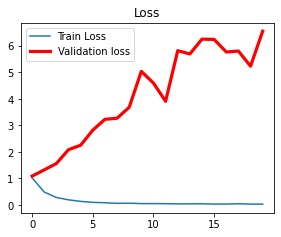

In [21]:
plt.figure(figsize = (10, 3.5))
plt.subplot(1, 2 , 1)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r', lw = 3.2, label = 'Validation loss')
plt.legend()

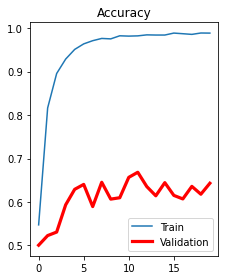

In [22]:
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], 'r', lw = 3.2, label = 'Validation')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
acc = model.evaluate(val_set, steps = len(val_set), verbose = 0)
print('Accuracy = {:.3f}' .format(acc[1]*100))

# ประเมิน Modelได้ 35% ต้องเพิ่มจำนวนภาพในการ train และเพิ่ม epoch

Accuracy = 64.321


In [24]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## ทดสอบและใช้งาน Model Predict ภาพ 


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
target_img_shape = (256,256)
test_image = image.load_img('/content/drive/My Drive/trycode/test/GZ7938 LE 22-12-20_002016.png', target_size=target_img_shape)   #ติด error

AttributeError: ignored

In [ ]:
test_image = image.img_to_array(test_image)   # เปลี่ยนเป็น array
test_image /= 255

plt.imshow(test_image)     # แสดงภาพ
plt.show()

AttributeError: ignored

In [ ]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

NameError: ignored

In [ ]:
result = model.predict(test_image)
result

NameError: ignored

In [ ]:
import glob

mylist = [f for f in glob.glob('./test_set*')]
imf_lst, y_pred_cls, y_pred = predict_CSC_NORMAL_PCV_VKH(mylist)

mylist
for i in mylist:
  print(os.path.basename(i), end=' | ')

NameError: ignored

## Confusion Matrix